<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Explication_1_0_1_regression_ridge_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
housing=pd.read_csv("https://dataks.bitbucket.io/ml/houses_poly20.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
housing.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,price
0,0.322873,0.101295,-0.059028,-0.132865,-0.148188,-0.138416,-0.122455,-0.107645,-0.095827,-0.086876,-0.080186,-0.075159,-0.071334,-0.068376,-0.066047,-0.064183,-0.062666,-0.061410,-0.060354,-0.059452,420000
1,-0.531239,-0.513639,-0.418851,-0.311237,-0.227199,-0.171030,-0.135341,-0.112598,-0.097697,-0.087575,-0.080444,-0.075255,-0.071369,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452,385000
2,-0.965221,-0.737589,-0.512233,-0.344044,-0.237446,-0.173998,-0.136160,-0.112817,-0.097755,-0.087590,-0.080448,-0.075256,-0.071370,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452,495000
3,0.692219,0.438753,0.188984,0.020028,-0.064754,-0.096362,-0.102329,-0.098343,-0.091631,-0.085017,-0.079372,-0.074807,-0.071183,-0.068311,-0.066020,-0.064172,-0.062661,-0.061408,-0.060353,-0.059452,605000
4,0.558331,0.311433,0.091710,-0.042236,-0.099991,-0.114760,-0.111439,-0.102695,-0.093657,-0.085943,-0.079789,-0.074993,-0.071265,-0.068347,-0.066035,-0.064178,-0.062664,-0.061409,-0.060354,-0.059452,610000
5,-0.457370,-0.469580,-0.397739,-0.302762,-0.224191,-0.170045,-0.135035,-0.112506,-0.097671,-0.087567,-0.080442,-0.075254,-0.071369,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452,660000
6,-0.586641,-0.545549,-0.433616,-0.316961,-0.229161,-0.171650,-0.135526,-0.112652,-0.097713,-0.087579,-0.080445,-0.075255,-0.071369,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452,660000
7,-0.457370,-0.469580,-0.397739,-0.302762,-0.224191,-0.170045,-0.135035,-0.112506,-0.097671,-0.087567,-0.080442,-0.075254,-0.071369,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452,690000
8,-0.161893,-0.276068,-0.295762,-0.257670,-0.206535,-0.163657,-0.132840,-0.111778,-0.097435,-0.087492,-0.080418,-0.075247,-0.071367,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452,838000
9,0.161284,-0.032761,-0.148392,-0.182783,-0.172845,-0.149655,-0.127313,-0.109671,-0.096651,-0.087205,-0.080315,-0.075210,-0.071354,-0.068383,-0.066050,-0.064184,-0.062666,-0.061410,-0.060354,-0.059452,885000


## Base d'apprentissage et de test

In [ ]:
from sklearn.model_selection import train_test_split

X = housing.loc[:, housing.columns != 'price']

y = housing[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
y

,price
0,420000
1,385000
2,495000
3,605000
4,610000
...,...
541,915000
542,940000
543,1030000
544,1050000


In [ ]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,0.322873,0.101295,-0.059028,-0.132865,-0.148188,-0.138416,-0.122455,-0.107645,-0.095827,-0.086876,-0.080186,-0.075159,-0.071334,-0.068376,-0.066047,-0.064183,-0.062666,-0.061410,-0.060354,-0.059452
1,-0.531239,-0.513639,-0.418851,-0.311237,-0.227199,-0.171030,-0.135341,-0.112598,-0.097697,-0.087575,-0.080444,-0.075255,-0.071369,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452
2,-0.965221,-0.737589,-0.512233,-0.344044,-0.237446,-0.173998,-0.136160,-0.112817,-0.097755,-0.087590,-0.080448,-0.075256,-0.071370,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452
3,0.692219,0.438753,0.188984,0.020028,-0.064754,-0.096362,-0.102329,-0.098343,-0.091631,-0.085017,-0.079372,-0.074807,-0.071183,-0.068311,-0.066020,-0.064172,-0.062661,-0.061408,-0.060353,-0.059452
4,0.558331,0.311433,0.091710,-0.042236,-0.099991,-0.114760,-0.111439,-0.102695,-0.093657,-0.085943,-0.079789,-0.074993,-0.071265,-0.068347,-0.066035,-0.064178,-0.062664,-0.061409,-0.060354,-0.059452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,-0.161893,-0.276068,-0.295762,-0.257670,-0.206535,-0.163657,-0.132840,-0.111778,-0.097435,-0.087492,-0.080418,-0.075247,-0.071367,-0.068388,-0.066052,-0.064185,-0.062666,-0.061410,-0.060354,-0.059452
542,0.392126,0.161278,-0.017291,-0.108537,-0.135651,-0.132457,-0.119769,-0.106477,-0.095332,-0.086671,-0.080101,-0.075125,-0.071321,-0.068370,-0.066045,-0.064182,-0.062666,-0.061410,-0.060354,-0.059452
543,0.392126,0.161278,-0.017291,-0.108537,-0.135651,-0.132457,-0.119769,-0.106477,-0.095332,-0.086671,-0.080101,-0.075125,-0.071321,-0.068370,-0.066045,-0.064182,-0.062666,-0.061410,-0.060354,-0.059452
544,0.392126,0.161278,-0.017291,-0.108537,-0.135651,-0.132457,-0.119769,-0.106477,-0.095332,-0.086671,-0.080101,-0.075125,-0.071321,-0.068370,-0.066045,-0.064182,-0.062666,-0.061410,-0.060354,-0.059452


# Régularisation

## Régression ridge

$$\hat y= \beta_0 + \beta_1 x_1+ ... +\beta_nx_n$$

$$MSE=\sum_{i=1}^{m}(y_i-\sum_{j=0}^{n}x_{ij}\beta_j)^2$$

$$MSEP=\sum_{i=1}^{m}(y_i-\sum_{j=0}^{n}x_{ij}\beta_j)^2+\lambda\sum_{j=0}^{n}\beta_j^2$$

In [ ]:

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error




In [ ]:

reglinreg=Ridge(alpha=2)

linreg=LinearRegression()

In [ ]:
reglinreg.fit(X_train,y_train)
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
numpy_data = np.vstack((linreg.coef_,reglinreg.coef_))
df = pd.DataFrame(data=numpy_data.T)
print(df)

               0              1
0   8.146198e+10  183024.802522
1  -1.777014e+12   90952.520119
2   2.189912e+13  -42786.442025
3  -1.941700e+14 -102504.935603
4   1.313904e+15  -88033.387032
5  -6.891851e+15  -42810.350448
6   2.815785e+16    1454.877759
7  -8.958191e+16   32298.992070
8   2.204710e+17   48471.543578
9  -4.126162e+17   52964.927270
10  5.644916e+17   49497.224290
11 -5.079782e+17   41213.028906
12  1.778322e+17   30406.464259
13  2.416100e+17   18616.273511
14 -4.525834e+17    6810.490087
15  3.628427e+17   -4441.251990
16 -1.552025e+17  -14834.278996
17  2.515030e+16  -24233.734675
18  5.224640e+15  -32609.727114
19 -2.066025e+15  -39994.368572


## Evaluation régresion ridge

In [ ]:
housing_predictions = linreg.predict(X_train)
lin_rmse_train = np.sqrt(mean_squared_error(y_train, linreg.predict(X_train)))
lin_rmse_test = np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)))

In [ ]:
lin_rmse_train

216205.66934162777

In [ ]:
lin_rmse_test

2502527786.4873466

Evalution régression ridge

In [ ]:
housing_predictions = reglinreg.predict(X_train)
reglinreg_rmse_train = np.sqrt(mean_squared_error(y_train, reglinreg.predict(X_train)))
reglinreg_rmse_test = np.sqrt(mean_squared_error(y_test, reglinreg.predict(X_test)))

In [ ]:
reglinreg_rmse_train

221769.6386791485

In [ ]:
reglinreg_rmse_test

208429.74603540357

## Régression Lasso

LASSO = Least Absolute Shrinkage and Selection Operator

$$MSEP=\sum_{i=1}^{m}(y_i-\sum_{j=0}^{n}x_{ij}\beta_j)^2+\lambda\sum_{j=0}^{n} |\beta_j|$$

In [ ]:

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso


In [ ]:
reglinreg=Lasso(alpha=20000,max_iter=200000,tol=1)

linreg=LinearRegression()

In [ ]:
reglinreg.fit(X_train,y_train)


Lasso(alpha=20000, copy_X=True, fit_intercept=True, max_iter=200000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=1, warm_start=False)

In [ ]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
numpy_data = np.vstack((linreg.coef_,reglinreg.coef_))
df = pd.DataFrame(data=numpy_data.T)
print(df)

               0              1
0   8.146198e+10  123799.424598
1  -1.777014e+12       0.000000
2   2.189912e+13      -0.000000
3  -1.941700e+14      -0.000000
4   1.313904e+15      -0.000000
5  -6.891851e+15      -0.000000
6   2.815785e+16      -0.000000
7  -8.958191e+16      -0.000000
8   2.204710e+17      -0.000000
9  -4.126162e+17       0.000000
10  5.644916e+17       0.000000
11 -5.079782e+17       0.000000
12  1.778322e+17       0.000000
13  2.416100e+17       0.000000
14 -4.525834e+17       0.000000
15  3.628427e+17       0.000000
16 -1.552025e+17       0.000000
17  2.515030e+16       0.000000
18  5.224640e+15       0.000000
19 -2.066025e+15       0.000000


## Evaluation régresion Lasso

Evalution régression ridge

In [ ]:
housing_predictions = reglinreg.predict(X_train)
reglinreg_rmse_train = np.sqrt(mean_squared_error(y_train, reglinreg.predict(X_train)))
reglinreg_rmse_test = np.sqrt(mean_squared_error(y_test, reglinreg.predict(X_test)))

In [ ]:
reglinreg_rmse_train

229909.68625880821

In [ ]:
reglinreg_rmse_test

216857.6343408123

# Boucle régression régularisée

In [ ]:
df = pd.DataFrame(columns=('rmse_train', 'rmse_test'))

for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  reglinreg.fit(X_train, y_train)
  housing_predictions = reglinreg.predict(X_train)
  reglinreg_rmse_train = np.sqrt(mean_squared_error(y_train, reglinreg.predict(X_train)))
  reglinreg_rmse_test = np.sqrt(mean_squared_error(y_test, reglinreg.predict(X_test)))
  df.loc[i] = [reglinreg_rmse_train,reglinreg_rmse_test]

In [ ]:
df.describe()

,rmse_train,rmse_test
count,1000.000000,1000.000000
mean,225949.870821,225988.769961
std,6129.541138,14976.830733
min,202845.602158,183160.194098
25%,221740.198829,215853.486363
50%,226477.952798,225133.196725
75%,230285.336626,236444.111594
max,243327.463558,273818.439206


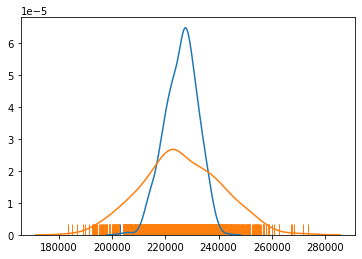

In [ ]:

sns.distplot(df[['rmse_train']], hist=False, rug=True)
sns.distplot(df[['rmse_test']], hist=False, rug=True)